In [2]:
import copy
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import svm

In [3]:
judge_2019 = pd.read_excel("data/2019.xlsx", "Sheet2")
judge_2019 = judge_2019.dropna()
judge_2019 = judge_2019.rename(columns={"County ": "County", "Population *": "Population",
                           "Percentage of White People **": "Percentage of White People"})
judge_2019

,County,Population,2020 Filings,2020 Judgements,Percentage Judgements to Filings,Population to 2020 Filings,Population to 2020 Judgements,Percentage of White People
0,Adams County,20094,32.0,11.0,0.343750,627.937500,1826.727273,0.927
1,Ashland County,15617,24.0,3.0,0.125000,650.708333,5205.666667,0.838
2,Barron County,45229,111.0,41.0,0.369369,407.468468,1103.146341,0.946
3,Bayfield County,14993,11.0,7.0,0.636364,1363.000000,2141.857143,0.861
4,Brown County,261368,1118.0,269.0,0.240608,233.781753,971.628253,0.843
...,...,...,...,...,...,...,...,...
68,Waupaca County,51245,112.0,10.0,0.089286,457.544643,5124.500000,0.962
69,Waushara County,24193,38.0,22.0,0.578947,636.657895,1099.681818,0.928
70,Winnebago County,170411,734.0,143.0,0.194823,232.167575,1191.685315,0.918
71,Wood County,73112,278.0,57.0,0.205036,262.992806,1282.666667,0.942


In [4]:
income = pd.read_csv("data/5year_est_income.csv")
income.columns = income.iloc[0, :]
income = income.iloc[1:, :]
income = income[['id', 'Geographic Area Name','Estimate!!Total!!Population 16 years and over with earnings!!FULL-TIME, YEAR-ROUND WORKERS WITH EARNINGS!!Mean earnings (dollars) for full-time, year-round workers with earnings',
       'Estimate!!Total!!Population 16 years and over with earnings!!FULL-TIME, YEAR-ROUND WORKERS WITH EARNINGS!!Median earnings (dollars) for full-time, year-round workers with earnings']]
income = income.rename(columns = {'Geographic Area Name':'County', 'Estimate!!Total!!Population 16 years and over with earnings!!FULL-TIME, YEAR-ROUND WORKERS WITH EARNINGS!!Mean earnings (dollars) for full-time, year-round workers with earnings':'Mean income',
                                  'Estimate!!Total!!Population 16 years and over with earnings!!FULL-TIME, YEAR-ROUND WORKERS WITH EARNINGS!!Median earnings (dollars) for full-time, year-round workers with earnings':'Median income'})
income['County'] = income['County'].map(lambda x: x[:-11])
income

,id,County,Mean income,Median income
1,0500000US55001,Adams County,48414,39410
2,0500000US55003,Ashland County,48075,41589
3,0500000US55005,Barron County,50323,40225
4,0500000US55007,Bayfield County,54186,44236
5,0500000US55009,Brown County,60689,47149
...,...,...,...,...
68,0500000US55133,Waukesha County,83908,62942
69,0500000US55135,Waupaca County,54379,44985
70,0500000US55137,Waushara County,52881,43710
71,0500000US55139,Winnebago County,59912,47048


In [5]:
merged = income.merge(judge_2019, on='County')
merged

,id,County,Mean income,Median income,Population,2020 Filings,2020 Judgements,Percentage Judgements to Filings,Population to 2020 Filings,Population to 2020 Judgements,Percentage of White People
0,0500000US55001,Adams County,48414,39410,20094,32.0,11.0,0.343750,627.937500,1826.727273,0.927
1,0500000US55003,Ashland County,48075,41589,15617,24.0,3.0,0.125000,650.708333,5205.666667,0.838
2,0500000US55005,Barron County,50323,40225,45229,111.0,41.0,0.369369,407.468468,1103.146341,0.946
3,0500000US55007,Bayfield County,54186,44236,14993,11.0,7.0,0.636364,1363.000000,2141.857143,0.861
4,0500000US55009,Brown County,60689,47149,261368,1118.0,269.0,0.240608,233.781753,971.628253,0.843
...,...,...,...,...,...,...,...,...,...,...,...
67,0500000US55133,Waukesha County,83908,62942,400475,432.0,69.0,0.159722,927.025463,5803.985507,0.922
68,0500000US55135,Waupaca County,54379,44985,51245,112.0,10.0,0.089286,457.544643,5124.500000,0.962
69,0500000US55137,Waushara County,52881,43710,24193,38.0,22.0,0.578947,636.657895,1099.681818,0.928
70,0500000US55139,Winnebago County,59912,47048,170411,734.0,143.0,0.194823,232.167575,1191.685315,0.918


In [6]:
target = merged['Percentage Judgements to Filings']
features = merged[['Mean income', 'Median income']]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(features, target)
regr.coef_

array([ 4.81217179e-06, -1.58541442e-05])

<AxesSubplot:xlabel='Mean income'>

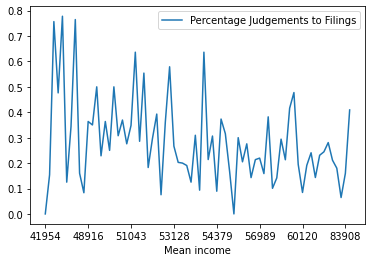

In [7]:
mean_income_judge = merged[['Mean income', 'Percentage Judgements to Filings']]
mean_income_judge = mean_income_judge.sort_values(by=["Mean income"])
mean_income_judge.plot(x='Mean income')

<AxesSubplot:xlabel='Median income'>

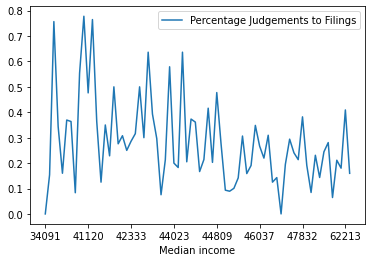

In [8]:
median_income_judge = merged[['Median income', 'Percentage Judgements to Filings']]
median_income_judge = median_income_judge.sort_values(by=["Median income"])
median_income_judge.plot(x='Median income')

In [9]:
cases = pd.read_csv("data/ccapoutputfile_20210706023712.csv")
cases = cases.drop(columns=['County'])
cases = cases.rename(columns={"CountyName": "County"})
cases


,CaseNumber,County,Name,FillingDate,Status,ModifiedDate,ZipCodes
0,2021SC015147,Milwaukee,Rosso Rei LLC,2021-06-30,Open,7/1/2021 3:26:14 PM,53210
1,2021SC015145,Milwaukee,251 Bradley Place LLC,2021-06-30,Open,7/1/2021 3:22:54 PM,53208
2,2021SC015143,Milwaukee,Shirlean Clayton,2021-06-30,Open,7/1/2021 3:20:41 PM,53225
3,2021SC015142,Milwaukee,Milwaukee Moderne LLC,2021-06-30,Open,7/1/2021 3:19:44 PM,53203
4,2021SC015068,Milwaukee,David Butler,2021-06-30,Open,7/1/2021 2:08:30 PM,53212
...,...,...,...,...,...,...,...
1390,2021SC000070,Forest,Darrell Ward,2021-06-14,Open,6/22/2021 8:39:42 PM,54566
1391,2021SC000068,Price,David Ames,2021-06-04,Closed,7/6/2021 4:59:25 PM,54459
1392,2021SC000051,Pepin,John Robelia,2021-06-08,Closed,7/1/2021 4:13:39 PM,54721
1393,2021SC000038,Iron,Chadwin Bucknell,2021-06-23,Open,6/23/2021 6:30:14 PM,54525


In [10]:
Agency = ["ADVOCAP", "CAP Services", "Central WI CAC", "Community Action, Inc.", "CouleeCAP",
          "Lakeshore CAP", "NewCAP", "NorthCentral CAP", "Northwest CSA", "Racine-Kenosha CAA",
          "Southwest CAP", "West CAP", "Western Dairyland EOC", "Community Advocates", "Social Development Commission",
          "Tenant Resource Center"]
Agency

['ADVOCAP',
 'CAP Services',
 'Central WI CAC',
 'Community Action, Inc.',
 'CouleeCAP',
 'Lakeshore CAP',
 'NewCAP',
 'NorthCentral CAP',
 'Northwest CSA',
 'Racine-Kenosha CAA',
 'Southwest CAP',
 'West CAP',
 'Western Dairyland EOC',
 'Community Advocates',
 'Social Development Commission',
 'Tenant Resource Center']

In [11]:
def map_state_to_agency(state):
    if state in ["Winnebago", "Calumet", "Fond du Lac", "Green Lake"]:
        return Agency[0]
    elif state in ["Portage" "Waupaca", "Outagamie", "Waushara", "Marquette"]:
        return Agency[1]
    elif state in ["Adams", "Juneau", "Sauk", "Columbia", "Dodge"]:
        return Agency[2]
    elif state in ["Rock", "Walworth"]:
        return Agency[3]
    elif state in ["La Crosse", "Monroe", "Vernon", "Crawford"]:
        return Agency[4]
    elif state in ["Door", "Kewaunee", "Manitowoc", "Sheboygan"]:
        return Agency[5]
    elif state in ["Vilas", "Oneida", "Langlade", "Menominee", "Shawano", "Oconto", "Marinette", "Forest", "Florence", "Brown"]:
        return Agency[6]
    elif state in ["Sawyer", "Rusk", "Taylor", "Lincoln", "Marathon", "Wood"]:
        return Agency[7]
    elif state in ["Douglas", "Bayfield", "Ashland", "Iron", "Price"]:
        return Agency[8]
    elif state in ["Racine", "Kenosha"]:
        return Agency[9]
    elif state in ["Richland", "Grant", "Iowa", "Lafayette", "Green"]:
        return Agency[10]
    elif state in ["Burnett", "Washburn", "Polk", "Barron", "St. Croix", "Dunn", "Chippewa", "Pierce", "Pepin"]:
        return Agency[11]
    elif state in ["Eau Claire", "Clark", "Buffalo", "Trempealeau", "Jackson"]:
        return Agency[12]
    elif state in ["Waukesha", "Milwaukee"]:
        return Agency[13]
    elif state in ["City of Milwaukee"]:
        return Agency[14]
    elif state in ["Dane"]:
        return Agency[15]
    else:
        return None


In [12]:
County_Agency = pd.DataFrame(merged["County"])
County_Agency["County"] = County_Agency["County"].map(lambda x: x[:-7])
col = []
for row in County_Agency[["County"]].itertuples():
    col.append(map_state_to_agency(row.County))
County_Agency["Agency"] = col
County_Agency

,County,Agency
0,Adams,Central WI CAC
1,Ashland,Northwest CSA
2,Barron,West CAP
3,Bayfield,Northwest CSA
4,Brown,NewCAP
...,...,...
67,Waukesha,Community Advocates
68,Waupaca,None
69,Waushara,CAP Services
70,Winnebago,ADVOCAP


In [13]:
cases = cases.merge(County_Agency, on='County')
cases


,CaseNumber,County,Name,FillingDate,Status,ModifiedDate,ZipCodes,Agency
0,2021SC015147,Milwaukee,Rosso Rei LLC,2021-06-30,Open,7/1/2021 3:26:14 PM,53210,Community Advocates
1,2021SC015145,Milwaukee,251 Bradley Place LLC,2021-06-30,Open,7/1/2021 3:22:54 PM,53208,Community Advocates
2,2021SC015143,Milwaukee,Shirlean Clayton,2021-06-30,Open,7/1/2021 3:20:41 PM,53225,Community Advocates
3,2021SC015142,Milwaukee,Milwaukee Moderne LLC,2021-06-30,Open,7/1/2021 3:19:44 PM,53203,Community Advocates
4,2021SC015068,Milwaukee,David Butler,2021-06-30,Open,7/1/2021 2:08:30 PM,53212,Community Advocates
...,...,...,...,...,...,...,...,...
1383,2021SC000070,Forest,Darrell Ward,2021-06-14,Open,6/22/2021 8:39:42 PM,54566,NewCAP
1384,2021SC000068,Price,David Ames,2021-06-04,Closed,7/6/2021 4:59:25 PM,54459,Northwest CSA
1385,2021SC000051,Pepin,John Robelia,2021-06-08,Closed,7/1/2021 4:13:39 PM,54721,West CAP
1386,2021SC000038,Iron,Chadwin Bucknell,2021-06-23,Open,6/23/2021 6:30:14 PM,54525,Northwest CSA


In [14]:
call_counts = pd.read_csv("211_counts_v2.csv")
call_counts = call_counts.drop("Unnamed: 0", axis=1, inplace=False)

In [15]:
# do the multiple regression at county level (in a year)
selected_columns = call_counts[["COUNTY", "DATE", "Housing & Shelter",
                                "(Housing & Shelter) Shelters", "(Housing & Shelter) Low-cost housing",
                                "(Housing & Shelter) Home repair/ maintenance", "(Housing & Shelter) Rent assistance",
                                "(Housing & Shelter) Mortgage assistance", "(Housing & Shelter) Landlord/ tenant issues",
                                "(Housing & Shelter) Contacts", "(Housing & Shelter) Other housing & shelter", "Total for top requests"]]
selected_columns

,COUNTY,DATE,Housing & Shelter,(Housing & Shelter) Shelters,(Housing & Shelter) Low-cost housing,(Housing & Shelter) Home repair/ maintenance,(Housing & Shelter) Rent assistance,(Housing & Shelter) Mortgage assistance,(Housing & Shelter) Landlord/ tenant issues,(Housing & Shelter) Contacts,(Housing & Shelter) Other housing & shelter,Total for top requests
0,Dodge,"Aug 1, 2019-Aug 31, 2019",21,4,4,0,10,1,2,0,0,59
1,Columbia,"Nov 1, 2019-Nov 30, 2019",2,0,0,0,2,0,0,0,0,24
2,Bayfield,"Jun 1, 2020-Jun 30, 2020",1,0,0,0,1,0,0,0,0,13
3,Buffalo,"Mar 1, 2021-Mar 31, 2021",7,1,3,1,2,0,0,0,0,27
4,Waupaca,"Apr 1, 2021-Apr 30, 2021",15,2,5,2,5,0,1,0,0,81
...,...,...,...,...,...,...,...,...,...,...,...,...
2011,Walworth,"Mar 1, 2021-Mar 31, 2021",26,3,13,3,5,1,1,0,0,274
2012,Bayfield,"Jan 1, 2021-Jan 31, 2021",1,0,0,0,1,0,0,0,0,7
2013,Adams,"Sep 1, 2019-Sep 30, 2019",13,3,2,1,6,0,1,0,0,64
2014,Winnebago,"Mar 1, 2020-Mar 31, 2020",94,23,8,0,59,3,1,0,0,432


In [16]:
judge_2020 = pd.read_excel("data/2020.xlsx", "Sheet2")
judge_2020 = judge_2020.dropna()
judge_2020 = judge_2020.rename(columns={"County ": "County", "Population *": "Population",
                           "Percentage of White People **": "Percentage of White People"})
judge_2020

,County,Population,2020 Filings,2020 Judgements,Percentage Judgements to Filings,Population to 2020 Filings,Population to 2020 Judgements,Percentage of White People
0,Adams County,20094,34.0,9.0,0.264706,591.000000,2232.666667,0.927
1,Ashland County,15617,25.0,10.0,0.400000,624.680000,1561.700000,0.838
2,Barron County,45229,93.0,23.0,0.247312,486.333333,1966.478261,0.946
3,Bayfield County,14993,9.0,4.0,0.444444,1665.888889,3748.250000,0.861
4,Brown County,261368,888.0,105.0,0.118243,294.333333,2489.219048,0.843
...,...,...,...,...,...,...,...,...
68,Waupaca County,51245,61.0,8.0,0.131148,840.081967,6405.625000,0.962
69,Waushara County,24193,36.0,23.0,0.638889,672.027778,1051.869565,0.928
70,Winnebago County,170411,632.0,111.0,0.175633,269.637658,1535.234234,0.918
71,Wood County,73112,233.0,41.0,0.175966,313.785408,1783.219512,0.942


In [17]:
merged_2020 = income.merge(judge_2020, on='County')
merged_2020

,id,County,Mean income,Median income,Population,2020 Filings,2020 Judgements,Percentage Judgements to Filings,Population to 2020 Filings,Population to 2020 Judgements,Percentage of White People
0,0500000US55001,Adams County,48414,39410,20094,34.0,9.0,0.264706,591.000000,2232.666667,0.927
1,0500000US55003,Ashland County,48075,41589,15617,25.0,10.0,0.400000,624.680000,1561.700000,0.838
2,0500000US55005,Barron County,50323,40225,45229,93.0,23.0,0.247312,486.333333,1966.478261,0.946
3,0500000US55007,Bayfield County,54186,44236,14993,9.0,4.0,0.444444,1665.888889,3748.250000,0.861
4,0500000US55009,Brown County,60689,47149,261368,888.0,105.0,0.118243,294.333333,2489.219048,0.843
...,...,...,...,...,...,...,...,...,...,...,...
67,0500000US55133,Waukesha County,83908,62942,400475,349.0,52.0,0.148997,1147.492837,7701.442308,0.922
68,0500000US55135,Waupaca County,54379,44985,51245,61.0,8.0,0.131148,840.081967,6405.625000,0.962
69,0500000US55137,Waushara County,52881,43710,24193,36.0,23.0,0.638889,672.027778,1051.869565,0.928
70,0500000US55139,Winnebago County,59912,47048,170411,632.0,111.0,0.175633,269.637658,1535.234234,0.918


In [18]:
selected_columns_2020 = selected_columns[selected_columns["DATE"].str.contains("2020")]
selected_columns_2020 = selected_columns.groupby("COUNTY", as_index = False).sum()
selected_columns_2020

,COUNTY,Housing & Shelter,(Housing & Shelter) Shelters,(Housing & Shelter) Low-cost housing,(Housing & Shelter) Home repair/ maintenance,(Housing & Shelter) Rent assistance,(Housing & Shelter) Mortgage assistance,(Housing & Shelter) Landlord/ tenant issues,(Housing & Shelter) Contacts,(Housing & Shelter) Other housing & shelter,Total for top requests
0,Adams,369,63,46,48,185,16,11,0,0,1726
1,Ashland,71,16,10,1,39,5,0,0,0,357
2,Barron,294,47,37,14,165,22,7,0,2,2127
3,Bayfield,33,6,2,2,18,4,1,0,0,180
4,Brown,4243,1213,862,125,1689,97,226,7,22,18161
...,...,...,...,...,...,...,...,...,...,...,...
67,Waukesha,3914,1253,885,156,1263,87,250,4,16,29297
68,Waupaca,510,58,90,22,290,27,20,2,1,2562
69,Waushara,272,24,52,30,138,17,11,0,0,1306
70,Winnebago,2774,571,628,82,1294,64,122,1,12,11354


In [19]:
def change_county(df):
    return df["COUNTY"] + " County"
selected_columns_2020["COUNTY"] = selected_columns_2020.apply(lambda x:change_county(x), axis=1)
selected_columns_2020 = selected_columns_2020.rename(columns={"COUNTY": "County"})
selected_columns_2020

,County,Housing & Shelter,(Housing & Shelter) Shelters,(Housing & Shelter) Low-cost housing,(Housing & Shelter) Home repair/ maintenance,(Housing & Shelter) Rent assistance,(Housing & Shelter) Mortgage assistance,(Housing & Shelter) Landlord/ tenant issues,(Housing & Shelter) Contacts,(Housing & Shelter) Other housing & shelter,Total for top requests
0,Adams County,369,63,46,48,185,16,11,0,0,1726
1,Ashland County,71,16,10,1,39,5,0,0,0,357
2,Barron County,294,47,37,14,165,22,7,0,2,2127
3,Bayfield County,33,6,2,2,18,4,1,0,0,180
4,Brown County,4243,1213,862,125,1689,97,226,7,22,18161
...,...,...,...,...,...,...,...,...,...,...,...
67,Waukesha County,3914,1253,885,156,1263,87,250,4,16,29297
68,Waupaca County,510,58,90,22,290,27,20,2,1,2562
69,Waushara County,272,24,52,30,138,17,11,0,0,1306
70,Winnebago County,2774,571,628,82,1294,64,122,1,12,11354


In [20]:
multi_re_df = selected_columns_2020.merge(merged_2020, on='County')

multi_re_df

,County,Housing & Shelter,(Housing & Shelter) Shelters,(Housing & Shelter) Low-cost housing,(Housing & Shelter) Home repair/ maintenance,(Housing & Shelter) Rent assistance,(Housing & Shelter) Mortgage assistance,(Housing & Shelter) Landlord/ tenant issues,(Housing & Shelter) Contacts,(Housing & Shelter) Other housing & shelter,...,id,Mean income,Median income,Population,2020 Filings,2020 Judgements,Percentage Judgements to Filings,Population to 2020 Filings,Population to 2020 Judgements,Percentage of White People
0,Adams County,369,63,46,48,185,16,11,0,0,...,0500000US55001,48414,39410,20094,34.0,9.0,0.264706,591.000000,2232.666667,0.927
1,Ashland County,71,16,10,1,39,5,0,0,0,...,0500000US55003,48075,41589,15617,25.0,10.0,0.400000,624.680000,1561.700000,0.838
2,Barron County,294,47,37,14,165,22,7,0,2,...,0500000US55005,50323,40225,45229,93.0,23.0,0.247312,486.333333,1966.478261,0.946
3,Bayfield County,33,6,2,2,18,4,1,0,0,...,0500000US55007,54186,44236,14993,9.0,4.0,0.444444,1665.888889,3748.250000,0.861
4,Brown County,4243,1213,862,125,1689,97,226,7,22,...,0500000US55009,60689,47149,261368,888.0,105.0,0.118243,294.333333,2489.219048,0.843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,Waukesha County,3914,1253,885,156,1263,87,250,4,16,...,0500000US55133,83908,62942,400475,349.0,52.0,0.148997,1147.492837,7701.442308,0.922
68,Waupaca County,510,58,90,22,290,27,20,2,1,...,0500000US55135,54379,44985,51245,61.0,8.0,0.131148,840.081967,6405.625000,0.962
69,Waushara County,272,24,52,30,138,17,11,0,0,...,0500000US55137,52881,43710,24193,36.0,23.0,0.638889,672.027778,1051.869565,0.928
70,Winnebago County,2774,571,628,82,1294,64,122,1,12,...,0500000US55139,59912,47048,170411,632.0,111.0,0.175633,269.637658,1535.234234,0.918


In [21]:
train_col = ["(Housing & Shelter) Shelters", "(Housing & Shelter) Low-cost housing",
        "(Housing & Shelter) Home repair/ maintenance", "(Housing & Shelter) Rent assistance",
         "(Housing & Shelter) Mortgage assistance", "(Housing & Shelter) Landlord/ tenant issues",
         "(Housing & Shelter) Contacts", "(Housing & Shelter) Other housing & shelter"]

calls_211_model = linear_model.LinearRegression()
calls_211_model.fit(multi_re_df[train_col], multi_re_df["2020 Filings"])

# calculate the R squared
calls_211_model.score(multi_re_df[train_col], multi_re_df["2020 Filings"])

0.9951691029650477

Text(0.5, 1.0, 'Figure: Multiple Regression in county level by year Coefficients')

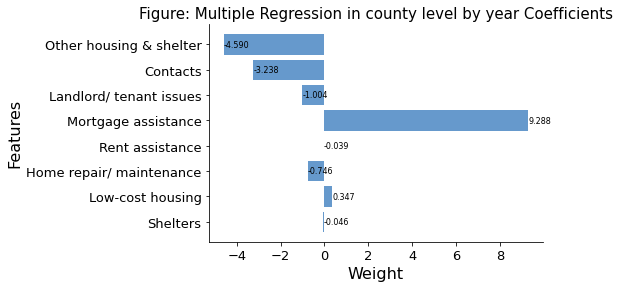

In [22]:
# draw the coefficient plot
import re
a=r'\(.*?\)'
idx = [re.sub(a, '', t).strip() for t in train_col]
fig, ax = plt.subplots()

ax_ = ax.barh(range(len(idx)), calls_211_model.coef_, color='#6699CC')
ax.tick_params(labelsize=13)
for rect in ax_:
    w = rect.get_width()
    ax.text(w, rect.get_y()+rect.get_height()/2,
            "%.3f" % w, ha='left', va='center', fontsize = 8)
ax.set_yticks(range(len(idx)))
ax.set_yticklabels(idx)
ax.set_xlabel("Weight", fontsize=16)
ax.set_ylabel("Features", fontsize=16)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("Figure: Multiple Regression in county level by year Coefficients", fontsize=15)


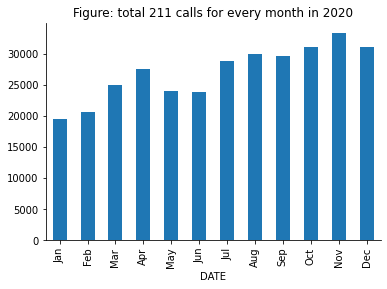

In [23]:
# more plots
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
calls_2020 = call_counts[call_counts["DATE"].str.contains("2020")]
calls_2020 = calls_2020[["COUNTY", "DATE","Total for top requests"]]
result = calls_2020.groupby('DATE', as_index=False).sum()
def get_month(df):
    return df["DATE"][:3]
result["DATE"] = result.apply(lambda r:get_month(r), axis = 1)
result['DATE'] = pd.Categorical(result['DATE'], categories=months, ordered=True)
result.sort_values(by='DATE',ascending=True,inplace=True)  # same as you have now; can use inplace=True
ax2 = result.plot.bar(x="DATE", y= "Total for top requests", legend = False)
ax2.set_title("Figure: total 211 calls for every month in 2020")
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
# line plot

Text(0.5, 1.0, 'Figure: Housing & Shelter 211 calls for every month in 2020')

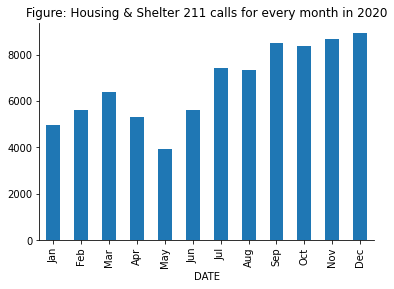

In [24]:
calls_2020 = call_counts[call_counts["DATE"].str.contains("2020")]
calls_2020 = calls_2020[["COUNTY", "DATE","Housing & Shelter"]]
result2 = calls_2020.groupby('DATE', as_index=False).sum()
result2["DATE"] = result2.apply(lambda r:get_month(r), axis = 1)
result2['DATE'] = pd.Categorical(result2['DATE'], categories=months, ordered=True)
result2.sort_values(by='DATE',ascending=True,inplace=True)  # same as you have now; can use inplace=True
ax3 = result2.plot.bar(x="DATE", y= "Housing & Shelter", legend = False)
ax3.spines["top"].set_visible(False)
ax3.spines["right"].set_visible(False)
ax3.set_title("Figure: Housing & Shelter 211 calls for every month in 2020")
#line plot

In [25]:
years = [2019, 2020, 2021]
months = ['null','Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
months_full = ['null', 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
case_data_month_level = pd.DataFrame()

In [26]:
for year in years:
    month_data = pd.read_excel("data/"+str(year)+".xlsx", "Sheet1")
    year_data = pd.read_excel("data/"+str(year)+".xlsx", "Sheet2")
    year_data = year_data[:72]
    year_data = year_data[["County ", "Population *"]]
    year_data = year_data.rename(columns = {"County ": "COUNTY", "Population *": "Population"})
    for i in range(12):
        current_month = month_data[["Unnamed: 0", months_full[i+1], "Unnamed: "+ str((i+1)*2)]]
        current_month = current_month.rename(columns = {"Unnamed: 0": "COUNTY", months_full[i+1]: "Filled", "Unnamed: "+ str((i+1)*2): "Judgement"})
        current_month = current_month[1:73]
        current_month["COUNTY"] = current_month.apply(lambda x:change_county(x), axis = 1)
        current_month["DATE"] = months[i+1] +" "+str(year)
        current_month = current_month.merge(year_data, on = "COUNTY")
        frame = [case_data_month_level, current_month]
        case_data_month_level = pd.concat(frame)

case_data_month_level

,COUNTY,Filled,Judgement,DATE,Population
0,Adams County,2,1,Jan 2019,20094
1,Ashland County,0,0,Jan 2019,15617
2,Barron County,6,2,Jan 2019,45229
3,Bayfield County,1,0,Jan 2019,14993
4,Brown County,69,29,Jan 2019,261368
...,...,...,...,...,...
67,Waukesha County,NaN,NaN,Dec 2021,400475
68,Waupaca County,NaN,NaN,Dec 2021,51245
69,Waushara County,NaN,NaN,Dec 2021,24193
70,Winnebago County,NaN,NaN,Dec 2021,170411


In [27]:
import copy
def change_date_format(df):
    return df["DATE"][:3] + " "+ df["DATE"][7:11]
reformat_call_data = copy.deepcopy(call_counts)
reformat_call_data["DATE"] = call_counts.apply(lambda r:change_date_format(r), axis = 1)
reformat_call_data["COUNTY"] = reformat_call_data.apply(lambda x:change_county(x), axis = 1)
reformat_call_data

,COUNTY,DATE,Housing & Shelter,Food,Utilities,Healthcare & COVID-19,Mental Health & Addictions,Employment & Income,Clothing & Household,Child Care & Parenting,...,(Disaster) Contacts,(Disaster) Other disaster,(Other) Agency & other contact information,(Other) Community development & enrichment,(Other) Volunteering & donations,(Other) Support & advocacy,(Other) Complaints,(Other) Special population services,(Other) Special populations,(Other) All other requests
0,Dodge County,Aug 2019,21,6,6,4,6,1,2,0,...,0,1,5,0,0,0,0,0,0,0
1,Columbia County,Nov 2019,2,5,2,5,3,0,0,0,...,0,0,2,0,0,1,0,0,0,3
2,Bayfield County,Jun 2020,1,0,1,4,6,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,Buffalo County,Mar 2021,7,0,1,12,3,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Waupaca County,Apr 2021,15,2,1,42,6,2,3,0,...,0,0,2,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,Walworth County,Mar 2021,26,0,8,191,18,4,1,0,...,0,0,11,0,1,0,0,1,0,1
2012,Bayfield County,Jan 2021,1,0,0,1,3,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2013,Adams County,Sep 2019,13,5,11,4,6,0,2,0,...,0,5,6,0,1,0,2,0,0,2
2014,Winnebago County,Mar 2020,94,51,23,94,17,30,11,7,...,0,1,17,1,7,1,2,2,0,10


In [28]:
merged_monthly_level = reformat_call_data.merge(case_data_month_level, on=["COUNTY","DATE"])
merged_monthly_level = merged_monthly_level.dropna()
merged_monthly_level

,COUNTY,DATE,Housing & Shelter,Food,Utilities,Healthcare & COVID-19,Mental Health & Addictions,Employment & Income,Clothing & Household,Child Care & Parenting,...,(Other) Community development & enrichment,(Other) Volunteering & donations,(Other) Support & advocacy,(Other) Complaints,(Other) Special population services,(Other) Special populations,(Other) All other requests,Filled,Judgement,Population
0,Dodge County,Aug 2019,21,6,6,4,6,1,2,0,...,0,0,0,0,0,0,0,23,12,87715
1,Columbia County,Nov 2019,2,5,2,5,3,0,0,0,...,0,0,1,0,0,0,3,14,1,57133
2,Bayfield County,Jun 2020,1,0,1,4,6,0,0,0,...,0,0,0,0,0,0,0,2,2,14993
3,Buffalo County,Mar 2021,7,0,1,12,3,1,0,0,...,0,0,0,0,0,0,0,0,1,13126
4,Waupaca County,Apr 2021,15,2,1,42,6,2,3,0,...,0,1,0,0,1,0,1,6,0,51245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,Walworth County,Mar 2021,26,0,8,191,18,4,1,0,...,0,1,0,0,1,0,1,16,2,103074
2012,Bayfield County,Jan 2021,1,0,0,1,3,0,0,0,...,0,0,0,0,0,0,1,0,0,14993
2013,Adams County,Sep 2019,13,5,11,4,6,0,2,0,...,0,1,0,2,0,0,2,6,1,20094
2014,Winnebago County,Mar 2020,94,51,23,94,17,30,11,7,...,1,7,1,2,2,0,10,40,8,170411


In [29]:

# multiple regression on monthly level
train_col_month = ["(Housing & Shelter) Shelters", "(Housing & Shelter) Low-cost housing",
        "(Housing & Shelter) Home repair/ maintenance", "(Housing & Shelter) Rent assistance",
         "(Housing & Shelter) Mortgage assistance", "(Housing & Shelter) Landlord/ tenant issues",
         "(Housing & Shelter) Contacts", "(Housing & Shelter) Other housing & shelter"]

calls_211_model_month = linear_model.LinearRegression()
calls_211_model_month.fit(merged_monthly_level[train_col_month], merged_monthly_level["Filled"])

# calculate the R squared
calls_211_model_month.score(merged_monthly_level[train_col_month], merged_monthly_level["Filled"])

0.7542522319982843

Text(0.5, 1.0, 'Figure: Multiple Regression in month level Coefficients')

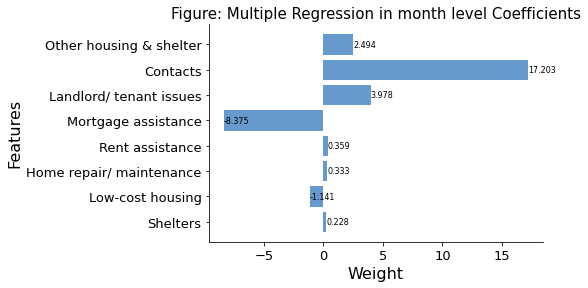

In [30]:
a=r'\(.*?\)'
idx = [re.sub(a, '', t).strip() for t in train_col_month]
fig, ax = plt.subplots()

ax_ = ax.barh(range(len(idx)), calls_211_model_month.coef_, color='#6699CC')
ax.tick_params(labelsize=13)
for rect in ax_:
    w = rect.get_width()
    ax.text(w, rect.get_y()+rect.get_height()/2,
            "%.3f" % w, ha='left', va='center', fontsize = 8)
ax.set_yticks(range(len(idx)))
ax.set_yticklabels(idx)
ax.set_xlabel("Weight", fontsize=16)
ax.set_ylabel("Features", fontsize=16)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("Figure: Multiple Regression in month level Coefficients", fontsize=15)

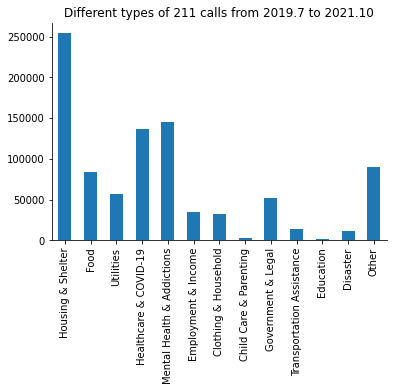

In [31]:
whole_view = call_counts.iloc[:,2:15]
ax = whole_view.sum().plot.bar()
ax.set_title("Different types of 211 calls from 2019.7 to 2021.10")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

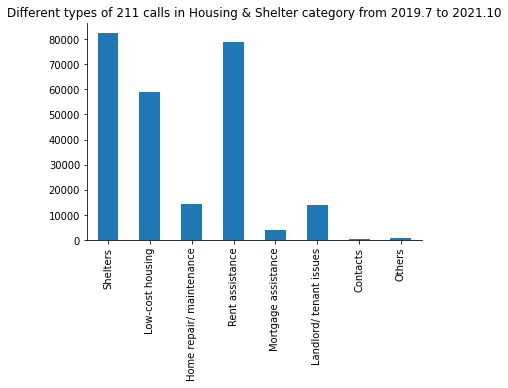

In [32]:
housing_calls = call_counts[train_col]
housing_calls = housing_calls.rename(columns = {"(Housing & Shelter) Shelters":"Shelters",
                                "(Housing & Shelter) Low-cost housing": "Low-cost housing",
                                "(Housing & Shelter) Home repair/ maintenance": "Home repair/ maintenance",
                                "(Housing & Shelter) Rent assistance":"Rent assistance",
                                "(Housing & Shelter) Mortgage assistance": "Mortgage assistance",
                                "(Housing & Shelter) Landlord/ tenant issues": "Landlord/ tenant issues",
                                "(Housing & Shelter) Contacts": "Contacts",
                                "(Housing & Shelter) Other housing & shelter": "Others"})
ax = housing_calls.sum().plot.bar()
ax.set_title("Different types of 211 calls in Housing & Shelter category from 2019.7 to 2021.10")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

In [33]:

wisconsin = gpd.read_file("Wisconsin/counties.geojson")
wisconsin = wisconsin[["NAME", "geometry"]]
wisconsin

,NAME,geometry
0,Racine County,"POLYGON ((-88.07073 42.66976, -88.06897 42.669..."
1,Clark County,"POLYGON ((-90.55875 44.42221, -90.53398 44.422..."
2,Wood County,"POLYGON ((-89.72464 44.33712, -89.72460 44.338..."
3,Rusk County,"POLYGON ((-90.92517 45.37935, -90.92515 45.379..."
4,Ozaukee County,"POLYGON ((-87.89269 43.19202, -87.89265 43.192..."
...,...,...
67,Washburn County,"POLYGON ((-91.55065 46.07034, -91.55065 46.070..."
68,Monroe County,"POLYGON ((-90.55246 43.72565, -90.55096 43.725..."
69,Richland County,"POLYGON ((-90.31107 43.55399, -90.31108 43.553..."
70,Price County,"POLYGON ((-90.04485 45.81765, -90.04440 45.830..."


In [34]:
case_data = case_data_month_level.groupby("COUNTY", as_index=False).sum()[["COUNTY", "Filled", "Judgement"]]
case_data = case_data.rename(columns = {"COUNTY": "NAME"})
merged_map = case_data.merge(wisconsin, on = "NAME")
merged_map["rate"] = merged_map["Judgement"]/merged_map["Filled"]
merged_map = gpd.GeoDataFrame(merged_map)
merged_map

,NAME,Filled,Judgement,geometry,rate
0,Adams County,79,22,"POLYGON ((-89.78813 43.66281, -89.78813 43.662...",0.278481
1,Ashland County,55,15,"POLYGON ((-90.48837 45.98154, -90.48826 45.981...",0.272727
2,Barron County,250,85,"POLYGON ((-91.66238 45.63854, -91.66522 45.638...",0.340000
3,Bayfield County,24,12,"POLYGON ((-90.82798 47.11214, -90.82901 47.114...",0.500000
4,Brown County,2344,412,"POLYGON ((-88.13118 44.67693, -88.13585 44.676...",0.175768
...,...,...,...,...,...
67,Waukesha County,910,134,"POLYGON ((-88.18223 43.19257, -88.18314 43.192...",0.147253
68,Waupaca County,202,19,"POLYGON ((-88.73634 44.67907, -88.73717 44.679...",0.094059
69,Waushara County,82,45,"POLYGON ((-89.24708 43.98251, -89.24654 43.982...",0.548780
70,Winnebago County,1632,305,"POLYGON ((-88.40434 44.21108, -88.40433 44.211...",0.186887


Text(0.5, 1.0, 'Figure: case judgment rate in Wisconsin per county')

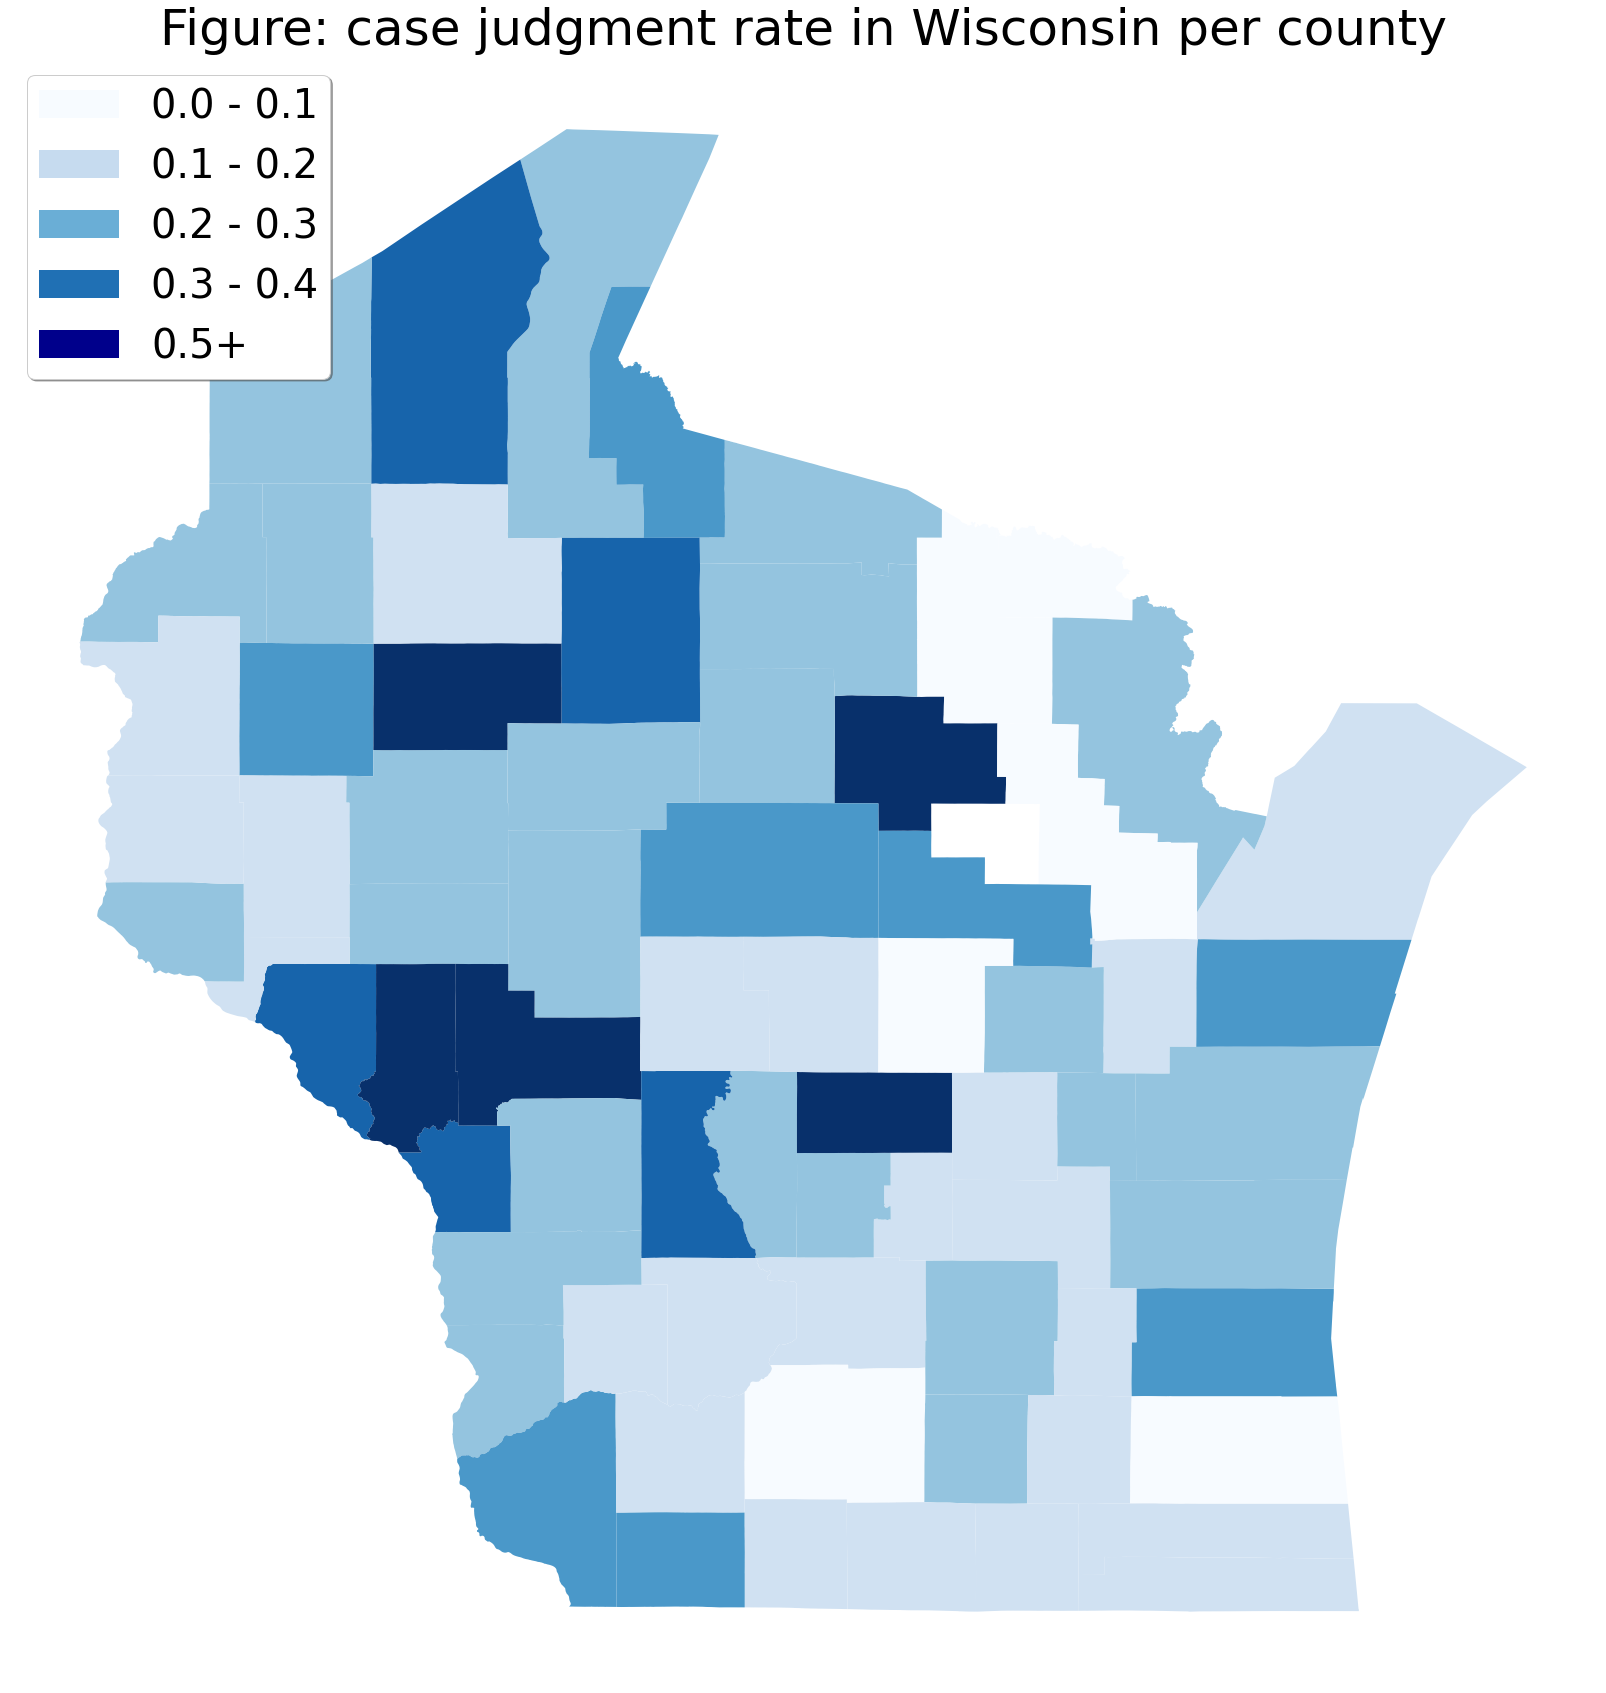

In [35]:
import matplotlib.patches as mpatches
import mapclassify as mc


bp = mc.UserDefined(merged_map["rate"], bins=[0.1, 0.2, 0.3, 0.4, 0.5])
ax = merged_map.plot(figsize = (50, 30), legend=True, scheme = 'UserDefined',
                  classification_kwds={'bins': [0.1, 0.2, 0.3, 0.4, 0.5]},
                  k = 5, column='rate', cmap = 'Blues')
handles, labels = ax.get_legend_handles_labels()
cmap = plt.get_cmap('Blues')
bins = bp.bins
bins = np.insert(bins, 0, 0)
LegendElement = [mpatches.Patch(facecolor=cmap(_*0.25), label=f'{max(bins[_], 0)} - {bins[_+1]}')
                 for _ in range(4)] + [mpatches.Patch(facecolor='#00008b', hatch='', label='0.5+')]
ax.legend(handles = LegendElement, loc='upper left', fontsize=40, shadow=True, borderpad=0.3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.axis('off')
ax.set_title("Figure: case judgment rate in Wisconsin per county", fontsize = 50)

In [36]:
# figure out whether model has over fit problems using cross validation
# first test model in county level
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from numpy import mean, absolute, sqrt
X = multi_re_df[train_col]
y = multi_re_df["2020 Filings"]
cv = KFold(n_splits=12, random_state=1, shuffle=True)
scores = cross_val_score(calls_211_model, X, y, scoring='neg_mean_absolute_error', cv = cv, n_jobs=1)
mean(absolute(scores))


279.7300311723805

In [37]:
# then test the model in month level
X = merged_monthly_level[train_col_month]
y = merged_monthly_level["Filled"]
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(calls_211_model_month, X, y, scoring='neg_mean_absolute_error', cv = cv, n_jobs=1)
mean(absolute(scores))

24.388328259483846

## So according to the cv, we can find the mean absolute error (MAE) for model in monthly level is much smaller than county level, so the county level has overfit problems.

Text(0.5, 1.0, 'Population VS shelter type of 211 calls')

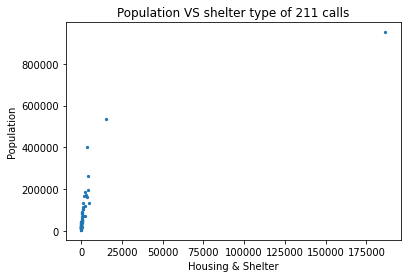

In [38]:
# plot population to 211 calls in 2020
ax = multi_re_df[["Population", "Housing & Shelter"]].plot.scatter(x = "Housing & Shelter", y = "Population", s = 5)
ax.set_title("Population VS shelter type of 211 calls")

Text(0.5, 1.0, 'Population VS total 211 calls')

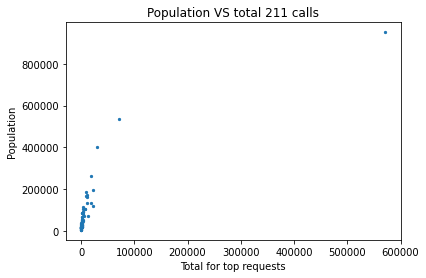

In [39]:
ax = multi_re_df[["Population", "Total for top requests"]].plot.scatter(x = "Total for top requests", y = "Population", s = 5)
ax.set_title("Population VS total 211 calls")

In [40]:
# See different model's R square to see performance

model_score_results = dict()
case_data_month_level = case_data_month_level.dropna()

# only using the population variable
X = merged_monthly_level[["Population"]]
y = merged_monthly_level["Filled"]
population_only_model = linear_model.LinearRegression()
population_only_model.fit(X, y)
model_score_results["Population"] = population_only_model.score(X, y)


# only using total 211 calls
X = merged_monthly_level[["Total for top requests"]]
y = merged_monthly_level["Filled"]
total_call_only_model = linear_model.LinearRegression()
total_call_only_model.fit(X, y)
model_score_results["Total 211 Calls"] = total_call_only_model.score(X, y)


# using both total 211 calls and population variable
X = merged_monthly_level[["Population", "Total for top requests"]]
y = merged_monthly_level["Filled"]
both_totalCall_and_Population = linear_model.LinearRegression()
both_totalCall_and_Population.fit(X, y)
model_score_results["Total 211 Calls and Population"] = both_totalCall_and_Population.score(X, y)


# using Only Big categories
X = merged_monthly_level[["Housing & Shelter", "Food", "Utilities", "Healthcare & COVID-19",
                          "Mental Health & Addictions", "Employment & Income", "Clothing & Household", "Clothing & Household",
                          "Child Care & Parenting", "Government & Legal", "Transportation Assistance", "Education", "Disaster", "Other"]]
y = merged_monthly_level["Filled"]
all_big_category_model = linear_model.LinearRegression()
all_big_category_model.fit(X, y)
model_score_results["All big categories"] = all_big_category_model.score(X, y)


# using Only sub categories

X = merged_monthly_level.loc[:, ~merged_monthly_level.columns.isin(["Housing & Shelter", "Food", "Utilities", "Healthcare & COVID-19",
                          "Mental Health & Addictions", "Employment & Income", "Clothing & Household", "Clothing & Household",
                          "Child Care & Parenting", "Government & Legal", "Transportation Assistance", "Education", "Disaster",
                          "Other", "Population", "COUNTY", "DATE", "Judgement", "Total for top requests", "Filled"])]
y = merged_monthly_level["Filled"]
all_sub_category_model = linear_model.LinearRegression()
all_sub_category_model.fit(X, y)
model_score_results["All sub categories"] = all_sub_category_model.score(X, y)


# using Big categories and population
X = merged_monthly_level[["Housing & Shelter", "Food", "Utilities", "Healthcare & COVID-19",
                          "Mental Health & Addictions", "Employment & Income", "Clothing & Household", "Clothing & Household",
                          "Child Care & Parenting", "Government & Legal", "Transportation Assistance", "Education", "Disaster",
                          "Other", "Population"]]
y = merged_monthly_level["Filled"]
big_category_and_population = linear_model.LinearRegression()
big_category_and_population.fit(X, y)
model_score_results["All big categories and population"] = big_category_and_population.score(X, y)


# using sub categories and population
X = merged_monthly_level.loc[:, ~merged_monthly_level.columns.isin(["Housing & Shelter", "Food", "Utilities", "Healthcare & COVID-19",
                          "Mental Health & Addictions", "Employment & Income", "Clothing & Household", "Clothing & Household",
                          "Child Care & Parenting", "Government & Legal", "Transportation Assistance", "Education", "Disaster",
                          "Other", "COUNTY", "DATE", "Judgement", "Total for top requests", "Filled"])]
y = merged_monthly_level["Filled"]
sub_category_and_population = linear_model.LinearRegression()
sub_category_and_population.fit(X, y)
model_score_results["All sub categories and population"] = sub_category_and_population.score(X, y)


# using only "Housing and Shelter" total calls
X = merged_monthly_level[["Housing & Shelter"]]
y = merged_monthly_level["Filled"]
only_housing_model = linear_model.LinearRegression()
only_housing_model.fit(X, y)
model_score_results["Only Housing & Shelter Category"] = only_housing_model.score(X, y)

# using Housing and Shelter and population
X = merged_monthly_level[["Housing & Shelter", "Population"]]
y = merged_monthly_level["Filled"]
both_house_and_population = linear_model.LinearRegression()
both_house_and_population.fit(X, y)
model_score_results["Housing and population"] = both_house_and_population.score(X, y)


# using Sub categories in Housing & Shelter
X = merged_monthly_level[train_col_month]
y = merged_monthly_level["Filled"]
only_housing_sub_model = linear_model.LinearRegression()
only_housing_sub_model.fit(X, y)
model_score_results["Sub categories in Housing & Shelter"] = only_housing_sub_model.score(X, y)


# using Sub categories in Housing & Shelter and population
X = merged_monthly_level[["(Housing & Shelter) Shelters", "(Housing & Shelter) Low-cost housing",
        "(Housing & Shelter) Home repair/ maintenance", "(Housing & Shelter) Rent assistance",
         "(Housing & Shelter) Mortgage assistance", "(Housing & Shelter) Landlord/ tenant issues",
         "(Housing & Shelter) Contacts", "(Housing & Shelter) Other housing & shelter", "Population"]]
y = merged_monthly_level["Filled"]
both_sub_house_and_population = linear_model.LinearRegression()
both_sub_house_and_population.fit(X, y)
model_score_results["Both Sub housing and Population"] = both_sub_house_and_population.score(X, y)

model_score_results

{'Population': 0.5953101727652217,
 'Total 211 Calls': 0.2779197166713543,
 'Total 211 Calls and Population': 0.6443982707623196,
 'All big categories': 0.8431676646195415,
 'All sub categories': 0.9774600431588301,
 'All big categories and population': 0.8663482247773677,
 'All sub categories and population': 0.9792087922400864,
 'Only Housing & Shelter Category': 0.2691739114242686,
 'Housing and population': 0.6493135231174443,
 'Sub categories in Housing & Shelter': 0.7542522319982843,
 'Both Sub housing and Population': 0.8269978519924046}

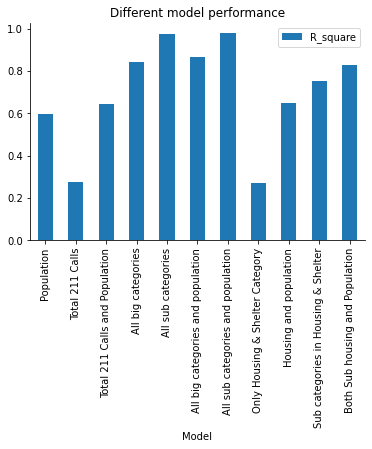

In [41]:
model_score_results_df = pd.DataFrame(model_score_results.items(), columns=['Model', 'R_square'])
ax = model_score_results_df.plot.bar(x = "Model")
ax.set_title("Different model performance")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

## 211 calls relationship with eviction rate

In [55]:
rate = merged_monthly_level[["COUNTY", "Filled", "Judgement"]]
rate_sum = rate.groupby("COUNTY", as_index = False).sum()
rate_sum["Rate"] = rate_sum["Judgement"]/rate_sum["Filled"]
calls = merged_monthly_level[["COUNTY", "DATE", "Total for top requests", "Housing & Shelter"]]
calls = calls.groupby("COUNTY", as_index = False).sum()
rate_sum = rate_sum.merge(calls, on = "COUNTY")
rate_sum

,COUNTY,Filled,Judgement,Rate,Total for top requests,Housing & Shelter
0,Adams County,70,18,0.257143,1434,309
1,Ashland County,44,14,0.318182,306,60
2,Barron County,195,66,0.338462,1833,262
3,Bayfield County,19,7,0.368421,154,30
4,Brown County,1848,275,0.148810,15949,3613
...,...,...,...,...,...,...
67,Waukesha County,716,98,0.136872,24717,3141
68,Waupaca County,150,11,0.073333,2272,442
69,Waushara County,51,29,0.568627,1134,234
70,Winnebago County,1322,231,0.174735,9622,2359


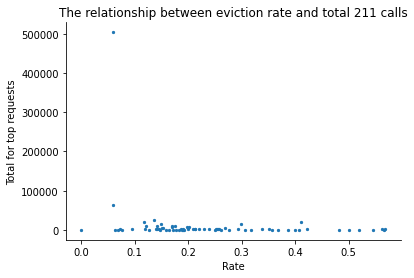

In [62]:
ax = rate_sum[["Rate", "Total for top requests"]].plot.scatter(x = "Rate", y = "Total for top requests", s = 5)
ax.set_title("The relationship between eviction rate and total 211 calls")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

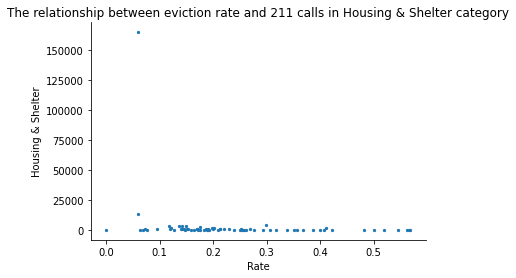

In [65]:
ax = rate_sum[["Rate", "Housing & Shelter"]].plot.scatter(x = "Rate", y = "Housing & Shelter", s = 5)
ax.set_title("The relationship between eviction rate and 211 calls in Housing & Shelter category")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)